# Compare Brown & York 1993 energy outside of R with lynden Bell 1985  

### Lynden Bell and Katz: Gravitational field energy density for spheres and black holes
### Brown and York: Quasilocal energy and conserved charges derived from the gravitational action

In [29]:
import sympy
import matplotlib.pyplot as plt
import numpy as np
import einsteinpy

from sympy import symbols, sin, cos, sinh, ln, pi, sqrt, diff
from sympy.utilities.lambdify import lambdify

from einsteinpy.symbolic import EinsteinTensor, MetricTensor, WeylTensor, RicciTensor, RicciScalar

sympy.init_printing()
print(einsteinpy.__version__)
import warnings
warnings.filterwarnings("ignore", category=UserWarning)




0.4.0


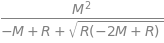

In [30]:
from sympy.abc import M, R, A
#lynden Bell 1985  Gravitational field energy density for spheres and black holes

# Total field energy outside R, where r is the Scwharshcild R - Top page 24p 
E_O_LB = M**2/(R - M + sqrt(R*(R-2*M)))

E_O_LB





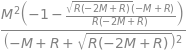

In [36]:
diff(E_O_LB, R)

In [37]:
# Brown - York - equations 6.14, 6.16 and prose "and the energy E**2/2R

E_Y = R*(1 - sqrt(1 - 2*M/R))
E_O_BY = E_Y**2/(2*R)
#E_O_BY = (R*(1 - sqrt(1 - 2*M/R)))**2/(2*R)

E_O_BY

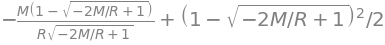

In [38]:
diff(E_O_BY, R)


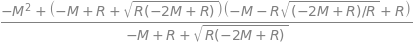

In [44]:
#difference
E_diff = E_O_BY - E_O_LB
E_diff = E_diff.expand().expand()
E_diff = E_diff.simplify()
E_diff

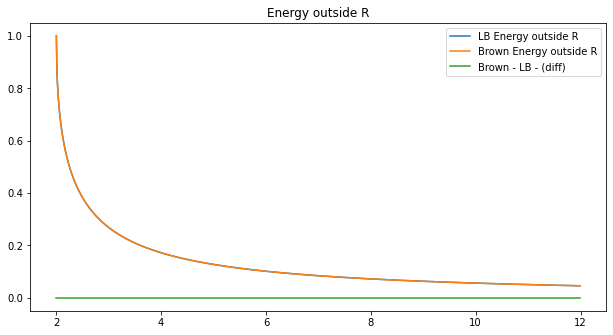

In [27]:
#wave front velocity as a function of r
# for a typical sine wave travelling along we have (v == velocity) 
#normalSin = sin(w*(syms[0] - syms[1]/v))
#so for us we have a wave front velocity - just mult by r/r and v
#normalSin = sin(w*(syms[0] - syms[1]/(syms[1]/ln(syms[1]*F)))
#M = 1
#Make x values - which we will sub in for r 
x = np.arange(2.0, 12, 0.01)
funcLB = lambdify([R,M], E_O_LB, "numpy")
funcBY = lambdify([R,M], E_O_BY, "numpy")
funcD = lambdify([R,M], E_diff, "numpy")
m_val = 1.0
E_LB_vals = funcLB(x, m_val)
E_BY_vals = funcBY(x, m_val)
E_D_vals = funcD(x, m_val)

fig=plt.figure(figsize=(8, 4))
ax=fig.add_axes([0,2,1.0,1.0])
ax.plot(x,E_LB_vals, label="LB Energy outside R")
ax.plot(x,E_BY_vals, label="Brown Energy outside R")
ax.plot(x,E_D_vals, label="Brown - LB - (diff)")

ax.set_title("Energy outside R")

ax.legend(loc="upper right")


### So LB and Brown agree on this energy. Finite amount of energy (M) at R = 2M, 